<a href="https://colab.research.google.com/github/TosinPhillip/HuggingFaceTrials/blob/main/Testing_PyTorch_Hub.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Having established that huggingface trasformers need a lot of work to make them into regular pytorch models, I have decided to train hf models with their Trainer class or use the AutoTrain, if the client can pay for it.


Now, I want to see how PyTorch's hub models behave.



YOLO has a few dependencies. Let's install them.

In [1]:
!pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt 
!pip install yacs # install dependencies

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.0 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import torch

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

/usr/local/lib/python3.10/dist-packages/torch/hub.py:286: UserWarning: You are about to download and run code from an untrusted repository. In a future release, this won't be allowed. To add the repository to your trusted list, change the command to {calling_fn}(..., trust_repo=False) and a command prompt will appear asking for an explicit confirmation of trust, or load(..., trust_repo=True), which will assume that the prompt is to be answered with 'yes'. You can also use load(..., trust_repo='check') which will only prompt for confirmation if the repo is not already trusted. This will eventually be the default behaviour
  warnings.warn(
Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to /root/.cache/torch/hub/master.zip
YOLOv5 🚀 2023-4-28 Python-3.10.11 torch-2.0.0+cu118 CUDA:0 (Tesla T4, 15102MiB)



requirements: /root/.cache/torch/hub/requirements.txt not found, check failed.


100%|██████████| 14.1M/14.1M [00:00<00:00, 84.1MB/s]

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [ ]:
from PIL import Image
import torchvision.transforms as transforms
import urllib.request

img = Image.open('/content/drive/MyDrive/Freelancing Portfolio/1.png')

urllib.request.urlretrieve('https://ultralytics.com/images/zidane.jpg', 'test_image')

img_2 = Image.open('test_image')
img_2.show(), img.show()

In [44]:
img_3 = ['https://ultralytics.com/images/zidane.jpg']

img_4 = ['/content/IMG_20211108_123157_transcpr.jpg']

In [ ]:
# img_4 = ['/content/IMG_20211108_123157_transcpr.jpg', '/content/IMG_16387053381708958.jpg']
results = model(img_3)
results.show()

In [6]:
# results.xyxy

In [ ]:
!pip install torch-summary

In [ ]:
model.train()
from torchsummary import summary
summary(model, input_size=( 3, 640, 640), device='cpu')

For deployment, Ultralytics module seems to be the easiest. Shall we work with them?

In [ ]:
!pip install ultralytics

In [ ]:
! pip install gradio

In [48]:
!pip install opencv-python

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/



Found https://ultralytics.com/images/zidane.jpg locally at zidane.jpg
image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 64.6ms
Speed: 2.0ms preprocess, 64.6ms inference, 1.5ms postprocess per image at shape (1, 3, 640, 640)


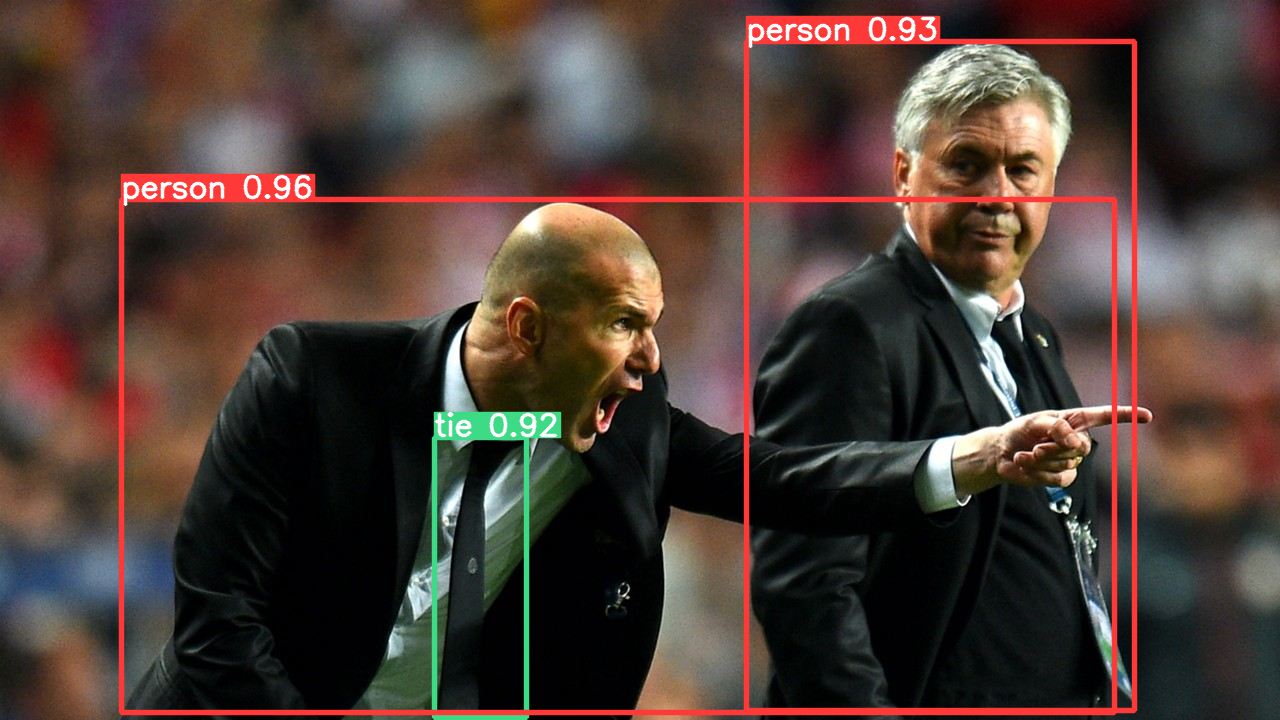

In [50]:
from PIL import Image
from google.colab.patches import cv2_imshow
img_3 = 'https://ultralytics.com/images/zidane.jpg'
model_1 = torch.load('/content/yolo8x.pkl')
cv2_imshow(model_1(img_3)[0].plot())

In [ ]:
import gradio as gr
model_1 = torch.load('/content/yolov5s.pt')
# model_1.eval()
def fn(input):
    results = model_1(input)
    return results
demo = gr.Interface(
    fn=fn,
    inputs=gr.Image(),
    outputs=gr.Image(),
    title='Testing camera',
    description = 'This is the description.',
    article = 'This is the article.'
)

demo.launch()

In [12]:
from ultralytics import YOLO 
from ultralytics.yolo.v8.detect.predict import DetectionPredictor


model = YOLO('yolov8x.pt')
#results = model.predict(source='/content/drive/MyDrive/Classroom/001ClayPotter.mpeg', show=True, stream=False)


100%|██████████| 131M/131M [00:00<00:00, 179MB/s]


In [27]:
torch.save(model, 'yolo8x.pkl')